conda activate env_name

pip install ipykernel --user

python -m ipykernel install --user --name env_name --display-name env_name

In [37]:
!pip install opencv-python

  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)


In [51]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
import pathlib
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import cv2
from tensorflow.keras.models import load_model

In [5]:
data_dir = pathlib.Path('D:\DATA_UPLOAD')
data_dir

WindowsPath('D:/DATA_UPLOAD')

In [6]:
image_size = (500, 500)
batch_size = 32

In [7]:
Training_Data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size = (500, 500),
    batch_size = 32,
    validation_split = 0.2,
    subset = 'training',
    seed = 42
)

Found 745 files belonging to 24 classes.
Using 596 files for training.


In [8]:
Validation_Data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size = (500, 500),
    batch_size = 32,
    validation_split = 0.2,
    subset = 'validation',
    seed = 42
)

Found 745 files belonging to 24 classes.
Using 149 files for validation.


In [9]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [10]:
normalized_ds = Training_Data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
# Notice the pixel values are now in `[0,1]`.
print(np.min(image_batch[0]), np.max(image_batch[0]))


0.0017838614 1.0


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

Training_Data = Training_Data.cache().prefetch(buffer_size=AUTOTUNE)
Validation_Data = Validation_Data.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
num_classes = 24

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, (3, 3), 1, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, (3, 3), 1, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, (3, 3), 1, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])



In [20]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [24]:
history = model.fit(
  Training_Data,
  validation_data=Validation_Data,
  epochs=7
)

Epoch 1/7
19/19 [==============================] - 10s 329ms/step - loss: 3.5560 - accuracy: 0.1611 - val_loss: 2.7805 - val_accuracy: 0.2013
Epoch 2/7
19/19 [==============================] - 4s 206ms/step - loss: 2.6528 - accuracy: 0.2534 - val_loss: 2.7416 - val_accuracy: 0.2013
Epoch 3/7
19/19 [==============================] - 4s 208ms/step - loss: 2.5422 - accuracy: 0.2668 - val_loss: 2.7000 - val_accuracy: 0.1879
Epoch 4/7
19/19 [==============================] - 4s 208ms/step - loss: 2.3669 - accuracy: 0.3121 - val_loss: 2.6699 - val_accuracy: 0.2081
Epoch 5/7
19/19 [==============================] - 4s 208ms/step - loss: 2.0052 - accuracy: 0.4027 - val_loss: 2.9151 - val_accuracy: 0.2685
Epoch 6/7
19/19 [==============================] - 4s 208ms/step - loss: 1.4398 - accuracy: 0.5822 - val_loss: 2.7775 - val_accuracy: 0.2953
Epoch 7/7
19/19 [==============================] - 4s 208ms/step - loss: 0.8248 - accuracy: 0.7517 - val_loss: 3.2304 - val_accuracy: 0.2752


In [25]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (500, 500)                0         
                                                                 
 conv2d (Conv2D)             multiple                  896       
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           multiple                  18496     
                                                                 
 max_pooling2d_1 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           multiple                  7

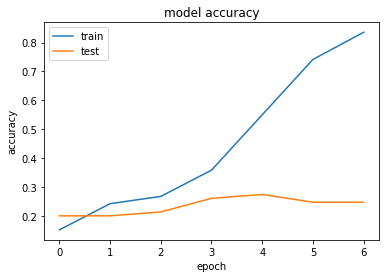

In [73]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

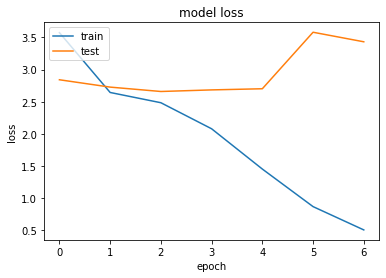

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

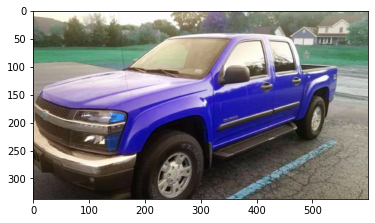

In [44]:
img = cv2.imread('D:\\DATA_UPLOAD\\2004 chevy colorado_00n0n_ki3989KrQH1_600x450.jpg')
plt.imshow(img)
plt.show()

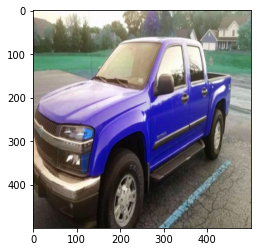

In [46]:
resize = tf.image.resize(img, (500, 500))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [47]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 414ms/step


In [49]:
yhat[0]

array([-0.80816174, -0.41238678,  0.424495  ,  0.36113694, -0.2974979 ,
        0.37233013, -0.5957702 ,  0.4719384 , -0.42857924, -1.3371221 ,
       -0.08206484, -1.1376716 , -0.7211411 ,  1.1140726 ,  0.13200541,
       -0.02263327,  0.2596528 ,  0.46700823, -0.3586914 , -0.00825168,
        0.1613031 ,  0.48454943, -0.33277473,  0.302409  ], dtype=float32)

In [55]:
model.save(os.path.join('D:\Python\.Tensor_Flow_Models\Car_Vision_Models', 'first_save.h5'))

In [57]:
new_model = load_model(os.path.join('D:\Python\.Tensor_Flow_Models\Car_Vision_Models', 'first_save.h5'))

ValueError: Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (500, 500)